In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Importing Dataset
data = pd.read_csv(r'C:\Users\Prachi\Desktop\Kaggle\house-prices-advanced-regression-techniques')

FileNotFoundError: ignored

In [ ]:
#Columns that can be eliminated e.g.Id(Useless)
data = data.drop(['Id','Alley','FireplaceQu','MiscFeature','Fence','PoolQC'],axis = 1) 

In [ ]:
#NaN Values
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = np.where(data[i].isnull(),data[i].mode(),data[i]) #cat_var NaN is replced by mode cat_var
    else:
         data[i] = np.where(data[i].isnull(),data[i].mean(),data[i]) # num_var NaN : mean

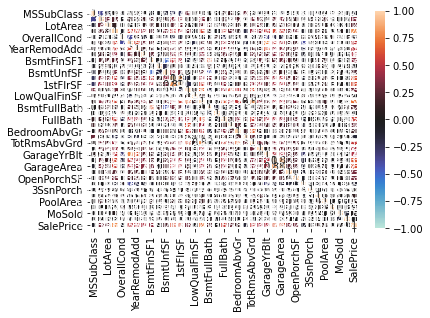

In [ ]:
#Separating numeric data to work on Correlation Matrix and Outlier Detection  
num_feat=[j for j in data.columns if data[j].dtype!="object"] # num_feat give name of cols only i.e.data[num_feat] provide data 
data2=data[num_feat].corr()
sns.heatmap(data2,annot=True,linewidths = 0.5,vmin=-1, vmax=1, center= 0) #heatmap actually contains 18 arguments 

In [ ]:
#Correlation Matrix
#plt.show()

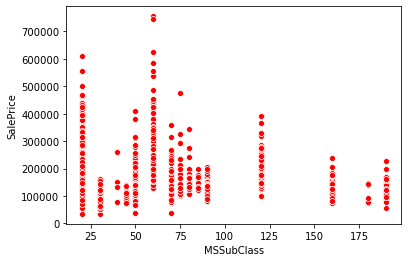

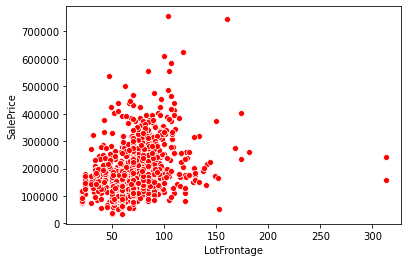

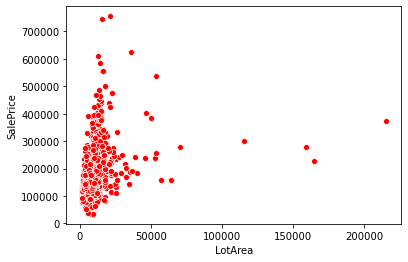

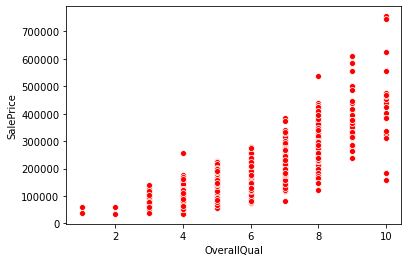

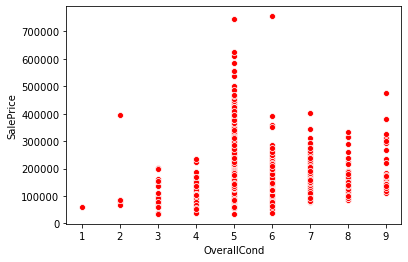

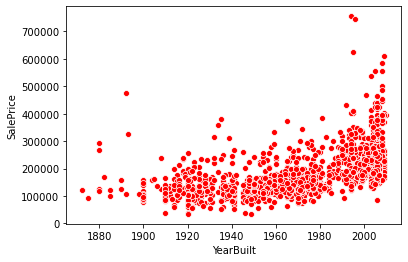

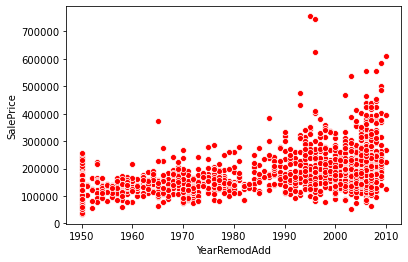

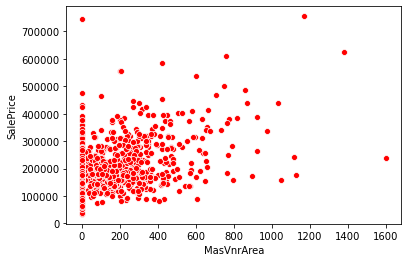

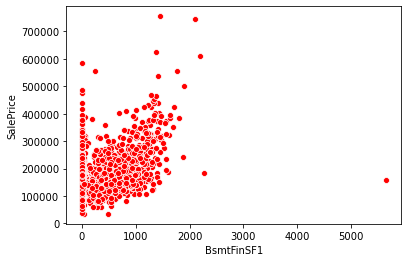

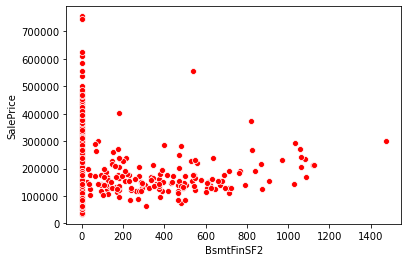

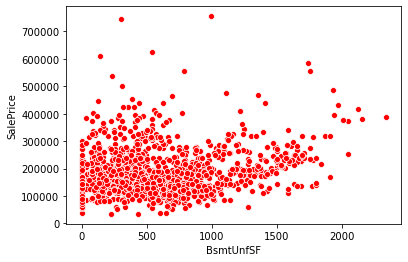

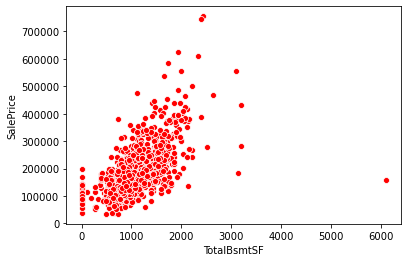

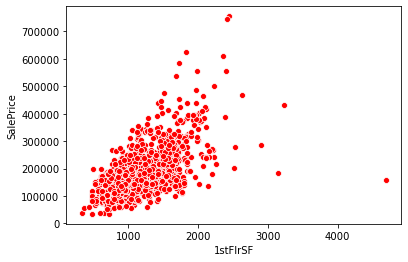

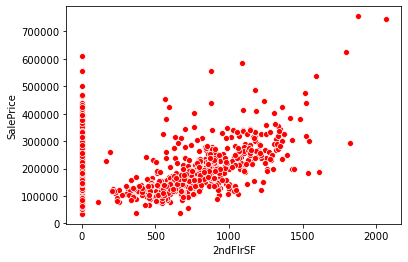

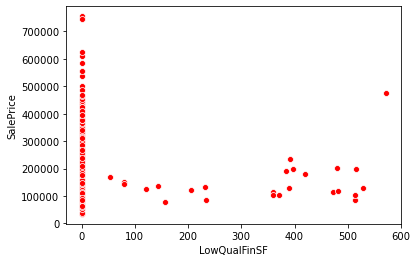

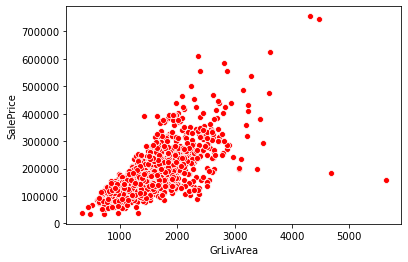

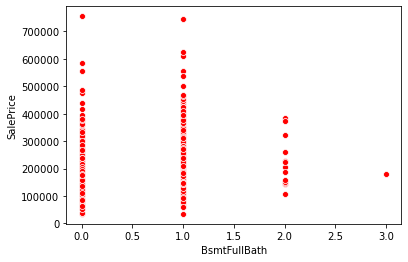

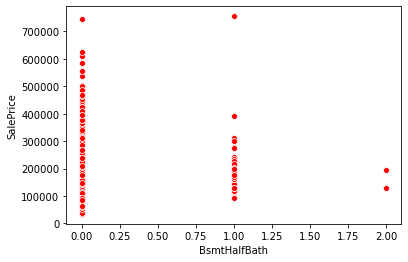

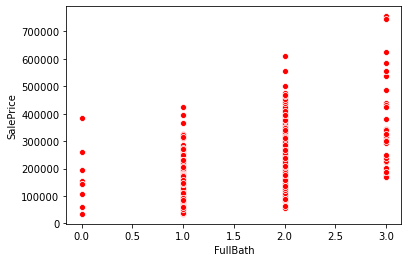

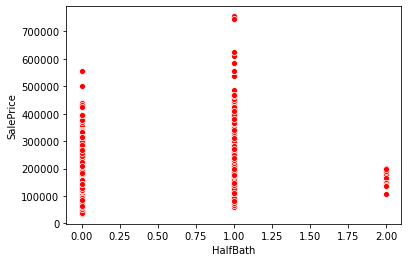

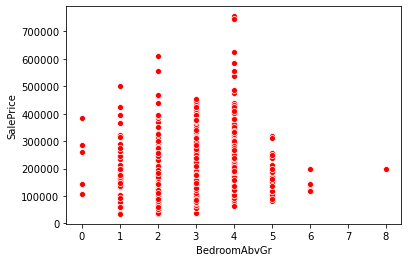

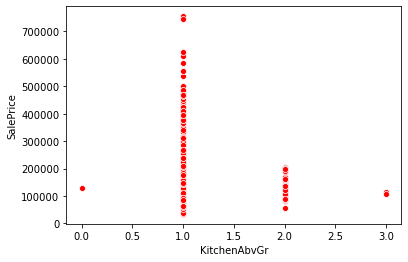

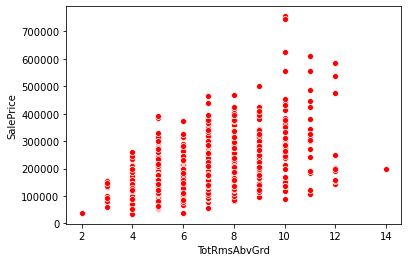

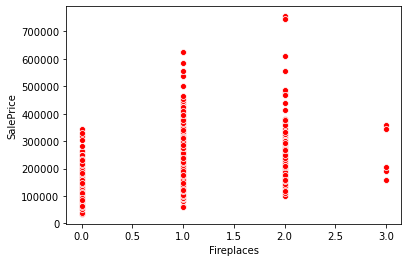

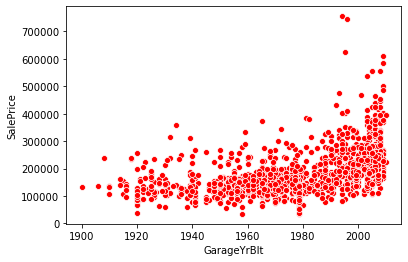

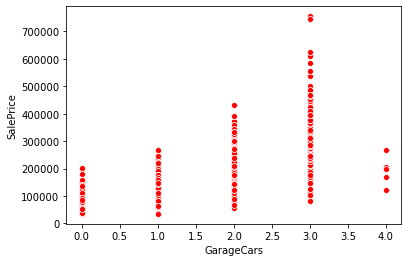

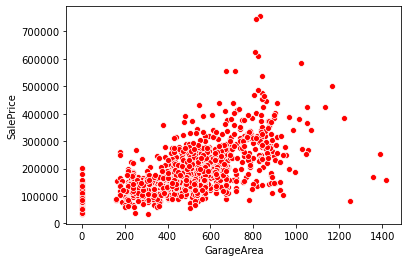

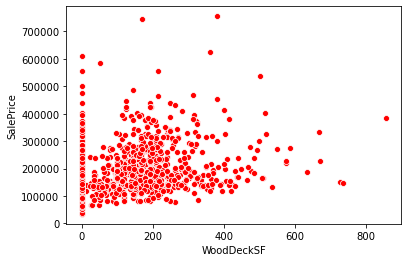

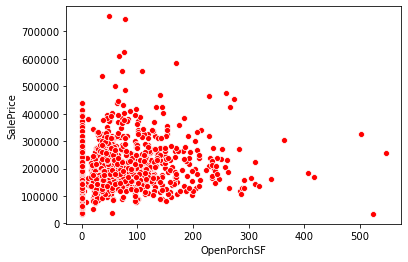

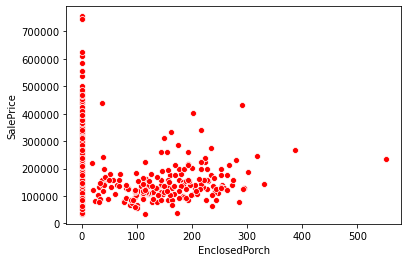

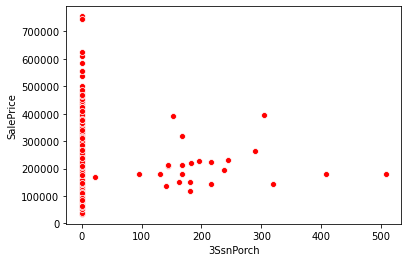

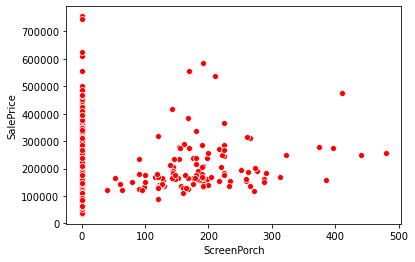

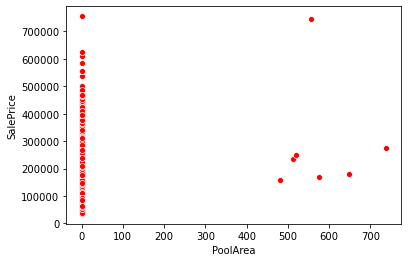

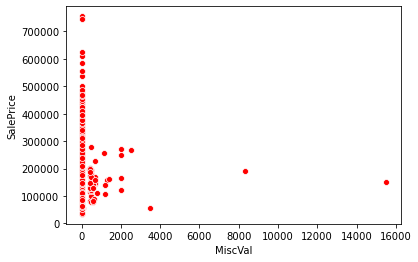

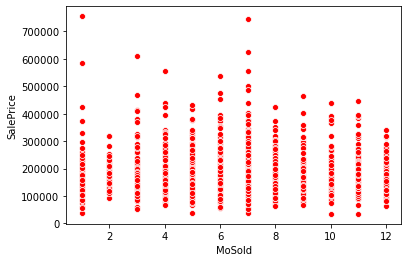

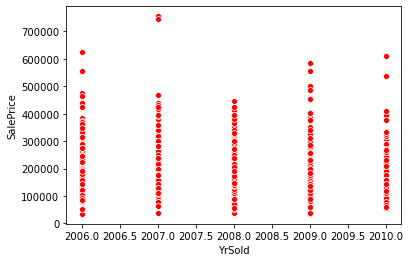

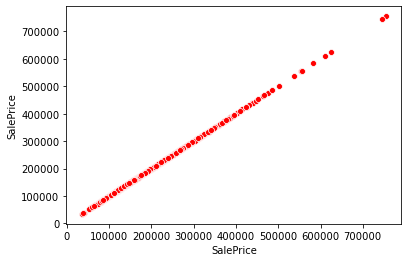

In [ ]:
#Finding ouliers using scatterplot
for i in num_feat:                                                               
    sns.scatterplot(data[i],data['SalePrice'],color = 'red')
    plt.title
    plt.show()

In [ ]:
#Removing outliers simply using drop function
data = data.drop(data.loc[data['LotFrontage']>300].index,axis = 'index')
data = data.drop(data.loc[data['LotArea']>100000].index,axis = 'index')
data = data.drop(data.loc[data['MasVnrArea']>1300].index,axis = 'index')
data = data.drop(data.loc[data['BsmtFinSF1']>5000].index,axis = 'index')
data = data.drop(data.loc[data['BsmtFinSF2']>1400].index,axis = 'index')
data = data.drop(data.loc[data['TotalBsmtSF']>6000].index,axis = 'index')
data = data.drop(data.loc[data['1stFlrSF']>4000].index,axis = 'index')
data = data.drop(data.loc[data['2ndFlrSF']>1800].index,axis = 'index')
data = data.drop(data.loc[data['GrLivArea']>4000].index,axis = 'index')
data = data.drop(data.loc[data['WoodDeckSF']>800].index,axis = 'index')
data = data.drop(data.loc[data['OpenPorchSF']>500].index,axis = 'index')
data = data.drop(data.loc[data['EnclosedPorch']>500].index,axis = 'index')

In [ ]:
#Separating categorical features(it means cat_feat represnts just name of the cols. that contain cat data)
cat_feat=[j for j in data.columns if data[j].dtype=="object"]

In [ ]:
data = data.drop(['GarageYrBlt','TotRmsAbvGrd','2ndFlrSF','BsmtFullBath','GarageCars'],axis = 1)

In [ ]:
#Converting categorical data into dummy variables using pandas get_dummies function
dummies = pd.get_dummies(data[cat_feat],drop_first=True)

#Dropping categorical data from the original dataset
data = data.drop(cat_feat,1)

# Concatinating data i.e. now converted into dummy variable
data = pd.concat([data ,dummies],1)      
#All data is numeric now !!!!!

In [ ]:
X = data.drop('SalePrice',1)     # Independent Variables
y = data['SalePrice']            #Dependent Variable

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

### Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#Predicting the Test set results
y_pred1 = regressor.predict(X_test)
#regressor.score(X_train ,y_train)............0.94247108038575589
#regressor.score(X_test ,y_test)..............0.87519331222823271

### Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=100,random_state = 0)
lasso.fit(X_train,y_train)
#Predicting the Test set results
y_pred2 = lasso.predict(X_test)
#lasso.score(X_train ,y_train).................0.93095364360602062
#lasso.score(X_test ,y_test)...................0.89757343113564503

### Fitting Ridge Regression to the Training set 
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=100,random_state = 0)
ridge.fit(X_train,y_train)
#Predicting the Test set results
y_pred3 = ridge.predict(X_test)
#ridge.score(X_train ,y_train)...................0.9137608570154796
#ridge.score(X_test ,y_test).....................0.88692450669209788